# Лабораторная работа №2 (Laboratory work 2)
### Исследование опасности дрожжей (Research on the dangers of yeast)

--------------------------------------
## Набор данных (Data set):
#### В этом разделе описываются основные характеристики набора данных дрожжей (несбалансированный: 1) и его атрибуты. (This section describes main characteristics of the Yeast (Imbalanced: 1) dataset and its attributes.)
#### Характеристики: (Characteristics:)
##### Тип: Несбалансированный (Type: Imbalanced)
##### Происхождение: Реальный мир (Origin: Real world)
##### Признаки (Features): 8 
##### (Действительный / Целое число / номинальный) (Real / Integer / Nominal): (8 / 0 / 0) 
##### Количество (Instances): 1484
##### IR: 2.46
##### % положительных случаев (% Positive instances): 28.9
##### % отрицательных случаев (% Negative instances): 71.1
##### Нулевые значения (Missing values): No
#### Несбалансированная версия набора данных дрожжей, где положительные примеры принадлежат классу NUC, а отрицательные примеры принадлежат остальным. (A imbalanced version of the Yeast dataset, where the possitive examples belong to class NUC and the negative examples belong to the rest.)
#### Микрококковая нуклеаза - это фермент, основным свойством которого является способность разрушать первичную структуру нуклеиновых кислот, в частности ДНК. Соответственно, важно научиться отделять "опасные" дрожжи от остальных. (Micrococcal nuclease is an enzyme whose main property is the ability to break the primary structure of nucleic acids, in particular DNA. Accordingly, it is important to learn how to separate "dangerous" yeast from the rest.)

--------------------------------------
## Задание 1-2 (Task 1-2)
#### Загрузка и анализ исходных данных (Downloading and analyzing input data).

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Datayeast.dat', header=None)
df.columns =['Mcg', 'Gvh', 'Alm', 'Mit', 'Erl', 'Pox', 'Vac', 'Nuc', 'Class']
df

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,negative
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,negative
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,negative
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,positive
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,negative
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,negative
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,positive
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,negative
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,positive


In [151]:
print(df.describe())
print(df['Class'].value_counts())

               Mcg          Gvh          Alm          Mit          Erl  \
count  1484.000000  1484.000000  1484.000000  1484.000000  1484.000000   
mean      0.500121     0.499933     0.500034     0.261186     0.504717   
std       0.137299     0.123924     0.086670     0.137098     0.048351   
min       0.110000     0.130000     0.210000     0.000000     0.500000   
25%       0.410000     0.420000     0.460000     0.170000     0.500000   
50%       0.490000     0.490000     0.510000     0.220000     0.500000   
75%       0.580000     0.570000     0.550000     0.320000     0.500000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               Pox          Vac          Nuc  
count  1484.000000  1484.000000  1484.000000  
mean      0.007500     0.499885     0.276199  
std       0.075683     0.057797     0.106491  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.480000     0.220000  
50%       0.000000     0.510000     0.220000  
75% 

### Вывод о данных (Data conclusion):
#### В предоставленном наборе данных можно видеть:
#### mcg: метод Макгеоха для распознавания последовательности сигналов. (McGeoch's method for signal sequence recognition.)
#### gvh: метод фон Хейне для распознавания последовательности сигналов. (von Heijne's method for signal sequence recognition.)
#### alm: Оценка программы прогнозирования области, охватывающей мембрану ALOM. (Score of the ALOM membrane spanning region prediction program.)
#### mit: Оценка дискриминантного анализа содержания аминокислот в N-концевой области (длиной 20 остатков) митохондриальных и немитохондриальных белков. (Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins.)
#### url: Наличие подстроки "HDEL" (считается, что она действует как сигнал к задержке в просвете эндоплазматического ретикулума). (Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen).)
#### pox: Пероксисомный целевой сигнал на С-конце. (Peroxisomal targeting signal in the C-terminus.)
#### vac: оценка дискриминантного анализа содержания аминокислот в вакуолярных и внеклеточных белках. (Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.)
#### nuc: Оценка дискриминантного анализа сигналов ядерной локализации ядерных и неядерных белков. (Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.)
#### Class: положительный/отрицательный случай. (positive/negative case.)

--------------------------------------
## Задание 3 (Task 3)
#### Стандартизация (Standardization)

In [1]:
from sklearn import preprocessing
import numpy as np

In [153]:
Columns = ['Mcg', 'Gvh', 'Alm', 'Mit', 'Erl', 'Pox', 'Vac', 'Nuc']
df['Class'] = df['Class'].replace(['negative', 'positive'],[0, 1], regex = True)
df.dropna()

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.581981,0.888481,-0.346645,-0.957203,-0.09759,-0.099131,-0.344175,-0.527919,0
1,-0.510891,1.372811,-0.231226,0.064312,-0.09759,-0.099131,0.521219,-0.527919,0
2,1.019130,0.969203,-0.115808,-0.811272,-0.09759,-0.099131,0.521219,-0.527919,0
3,0.581981,-0.483786,0.807542,-0.957203,-0.09759,-0.099131,0.694298,-0.527919,1
4,-0.583749,-0.483786,-0.231226,2.034375,-0.09759,-0.099131,-0.344175,-0.527919,0
...,...,...,...,...,...,...,...,...,...
1479,2.257718,0.969203,-0.808320,-0.665341,-0.09759,-0.099131,0.521219,-0.527919,0
1480,-0.219458,-0.564507,1.269217,1.012861,-0.09759,-0.099131,-0.344175,1.820499,1
1481,1.237705,0.565595,-1.616251,-0.519411,-0.09759,-0.099131,1.040456,-0.527919,0
1482,-0.510891,-0.806672,1.153799,-0.738307,-0.09759,-0.099131,0.521219,1.069005,1


In [ ]:
scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df[Columns])
df[Columns] = x
df

### Вывод (conclusion):
#### Данные стандартизированы и очищены от нулевых значений. (The data is standardized and cleared of zero values.)
#### А также для дальнейшего разбиения полученных данных с применением стратификации были заменены значения столбца "Class" на 0 и 1, где
#### 0 - negative;
#### 1 - positive.

--------------------------------------
## Задание 4 (Task 4)
### Разделяем полученный датафрейм на две выборки: обучающую* и тестовую выборки в соотношении 7 к 3 соответственно с применением стратификации. (We divide the resulting dataframe into two samples: training* and test samples in a ratio of 7 to 3, respectively, using stratification.)
##### *Валидационная выборка входит в обучающую и составляет 2 части из всех 10. В данном случае используем ее для вывода по наилучшей классификации между методами. (The validation sample is included in the training and consists of 2 parts out of all 10. In this case, we use it to infer the best classification between the methods.)

In [154]:
col = ['index'] + Columns + ['Class']

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
y = df['Class']
train_table, test_table = train_test_split(df, train_size = 0.7, stratify = y)
train_class, test_class = train_test_split(y, train_size = 0.7, stratify = y)

train_table = train_table.reset_index()
test_table = test_table.reset_index()
#train_class = train_class
#test_class = test_class

df_test_table = pd.DataFrame(test_table, columns = col)
df_train_table = pd.DataFrame(train_table, columns = col)

df_test_class = pd.DataFrame(test_class, columns = ['Class'])
df_train_class = pd.DataFrame(train_class, columns = ['Class'])

print('train_table:')
df_train_table

train_table:


,index,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,807,-1.822337,-0.887394,-0.000389,-0.227549,-0.09759,-0.099131,0.001983,0.035701,1
1,685,-0.729465,0.242709,-0.692901,-0.592376,-0.09759,-0.099131,0.694298,0.317511,1
2,651,0.363407,0.242709,0.461286,1.012861,-0.09759,-0.099131,-0.344175,-0.527919,0
3,594,1.747712,0.484874,-1.731670,0.721000,-0.09759,-0.099131,0.175062,-0.246109,0
4,21,-0.510891,-0.483786,-0.231226,-0.300515,-0.09759,-0.099131,0.175062,-0.527919,0
...,...,...,...,...,...,...,...,...,...,...
1033,831,0.436265,0.727038,0.461286,-0.592376,-0.09759,-0.099131,-0.344175,1.726562,1
1034,804,-1.020898,-0.887394,0.461286,-0.738307,-0.09759,-0.099131,0.001983,0.035701,1
1035,940,0.436265,-0.080178,0.461286,-0.811272,-0.09759,-0.099131,0.001983,0.693258,1
1036,475,-0.583749,-1.452445,1.269217,-0.957203,-0.09759,-0.099131,-6.228859,-0.058236,1


In [157]:
print('test_table:')
df_test_table

test_table:


,index,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,479,-0.292316,-0.725950,-0.000389,1.304722,-0.09759,-0.099131,0.521219,-0.527919,0
1,1002,-0.438033,0.969203,0.345867,0.064312,-0.09759,-0.099131,-0.171096,-0.527919,1
2,321,-1.093756,-1.129558,0.807542,-0.665341,-0.09759,-0.099131,0.348141,-0.527919,0
3,704,2.767725,0.727038,0.461286,0.939895,-0.09759,-0.099131,-1.555728,0.223574,1
4,373,-0.510891,0.323430,0.922961,-0.738307,-0.09759,-0.099131,0.001983,0.787195,1
...,...,...,...,...,...,...,...,...,...,...
441,953,-0.292316,0.242709,-0.346645,0.793965,-0.09759,-0.099131,0.175062,0.787195,1
442,1085,2.549151,1.534254,-1.847089,0.356173,-0.09759,-0.099131,1.213535,0.223574,0
443,851,-0.948039,-0.483786,0.115030,2.180306,-0.09759,-0.099131,0.001983,0.975068,1
444,1281,-0.583749,-1.048837,0.461286,-0.665341,-0.09759,-0.099131,0.175062,-0.527919,0


In [158]:
print(df_train_class.value_counts())
print(df_test_class.value_counts())

Class
0        738
1        300
dtype: int64
Class
0        317
1        129
dtype: int64


### Вывод (Conclusion):
#### Получаем 4 выборки в датафреймах: 2 выборки с признаками и классами (тестовую и обучающую) и 2 выборки только с классами (тестовую и обучающую). (We get 4 samples in dataframes: 2 samples with attributes and classes (test and training) and 2 samples with classes only (test and training).)
#### А также результаты разделения данных после стратификации. Для проверки: 738/300 = 317/129 = 2,46. (As well as the results of data separation after stratification. To check: 738/300 = 317/129 = 2.46.)

--------------------------------------
## Задание 5 (Task 5)
#### Деревья решений (Decision trees)

In [159]:
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.metrics import roc_auc_score

In [11]:
def MakingTree(crit, alpha):
    clf = tree.DecisionTreeClassifier(criterion = crit, ccp_alpha = alpha)
    clf.fit(train_table[Columns], train_table[['Class']])

    tree.plot_tree(clf, filled = True, rounded = True)
    plt.savefig('tree.pdf') ##для сохранение в пдф
    plt.show
    
    print("ROC_AUC(macro) = ", roc_auc_score(test_table[['Class']], clf.predict(test_table[Columns]), average = 'macro'))

## По Джинни (By Ginny)

ROC_AUC(macro) =  0.6764116107891327


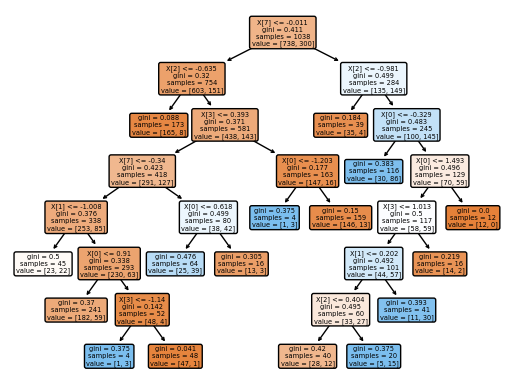

In [12]:
MakingTree('gini', 0.003)

ROC_AUC(macro) =  0.6686596728046366


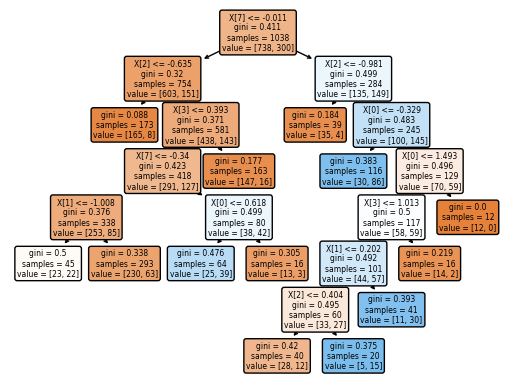

In [36]:
MakingTree('gini', 0.004)

ROC_AUC(macro) =  0.6976866456361724
Выбираем данную модель, потому что все предыдущие деревья переобучались и данное дерево имеет наибольшее значение ROC_AUC(macro).


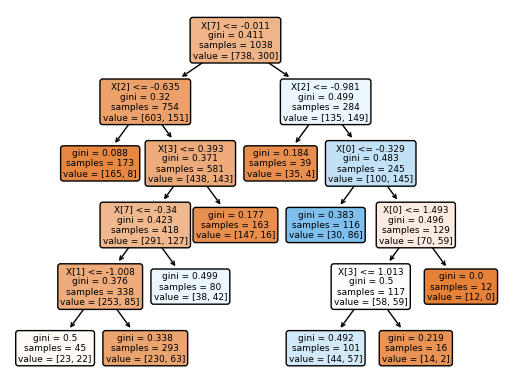

In [37]:
MakingTree('gini', 0.005)
print("Выбираем данную модель, потому что все предыдущие деревья переобучались и данное дерево имеет наибольшее значение ROC_AUC(macro).")

ROC_AUC(macro) =  0.6960604504438413


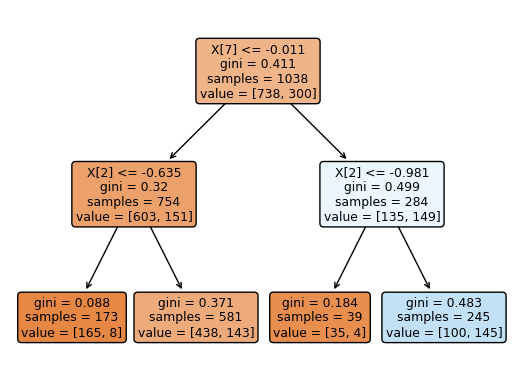

In [15]:
MakingTree('gini', 0.01)

ROC_AUC(macro) =  0.6960604504438413


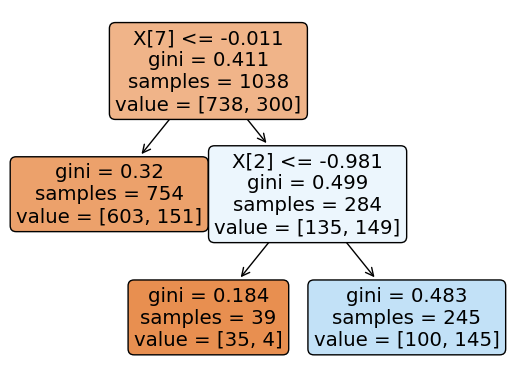

In [16]:
MakingTree('gini', 0.015)

ROC_AUC(macro) =  0.6722666471034162


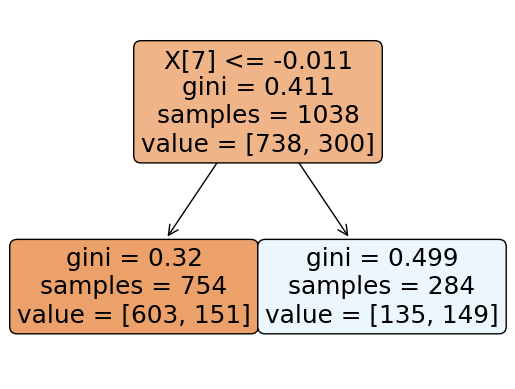

In [17]:
MakingTree('gini', 0.02)

ROC_AUC(macro) =  0.6722666471034162


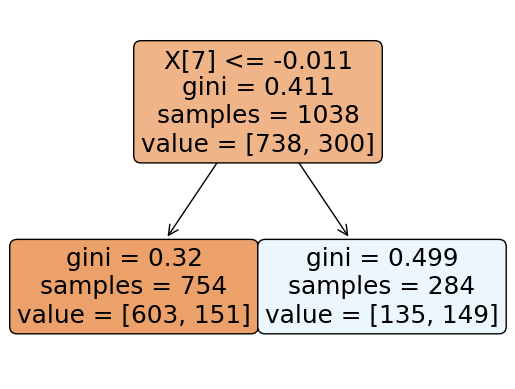

In [18]:
MakingTree('gini', 0.03)

ROC_AUC(macro) =  0.5


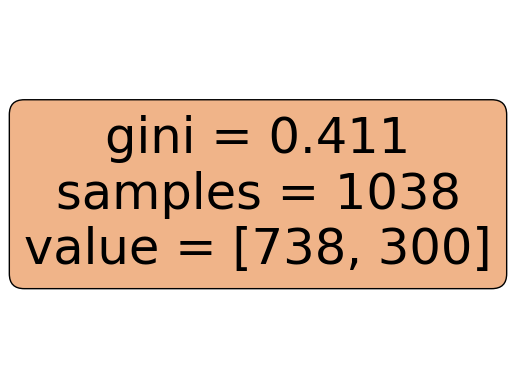

In [19]:
MakingTree('gini', 0.2)

ROC_AUC(macro) =  0.5


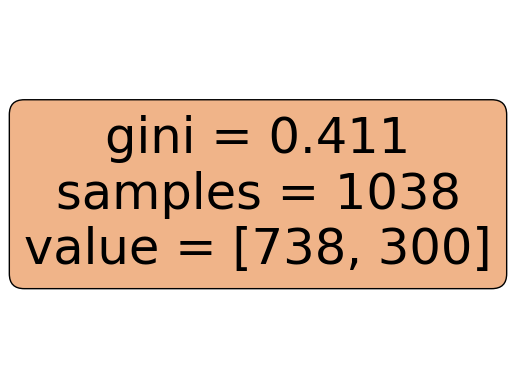

In [20]:
MakingTree('gini', 0.8)

## По энтропии (By entropy)

ROC_AUC(macro) =  0.7078228547673197


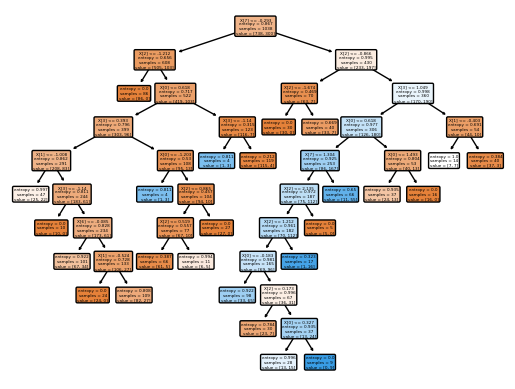

In [21]:
MakingTree('entropy', 0.005)

ROC_AUC(macro) =  0.698090137676375


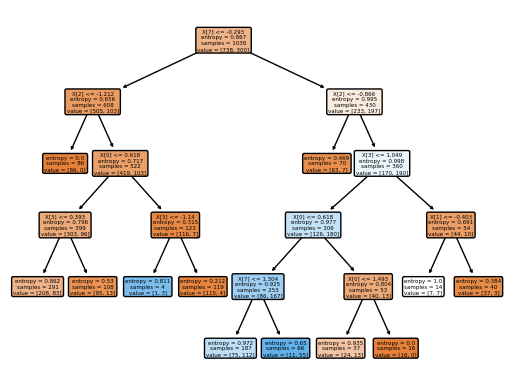

In [22]:
MakingTree('entropy', 0.007)

ROC_AUC(macro) =  0.698090137676375


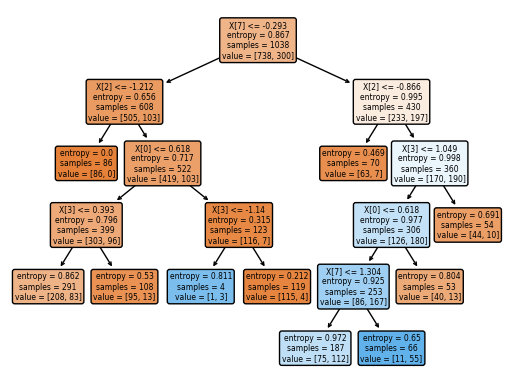

In [23]:
MakingTree('entropy', 0.008)

ROC_AUC(macro) =  0.698090137676375


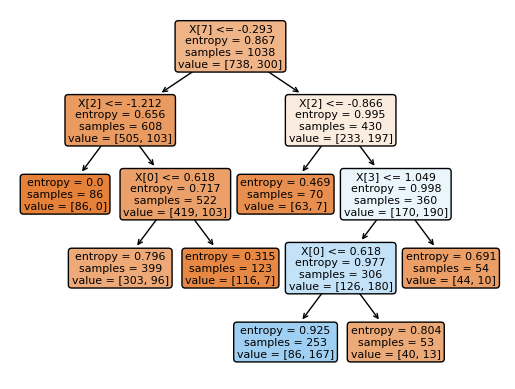

In [24]:
MakingTree('entropy', 0.01)

ROC_AUC(macro) =  0.698090137676375


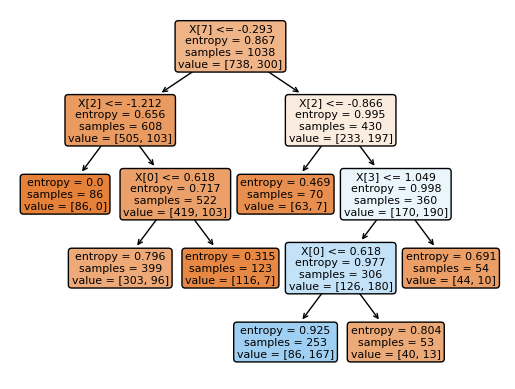

In [25]:
MakingTree('entropy', 0.015)

ROC_AUC(macro) =  0.698090137676375


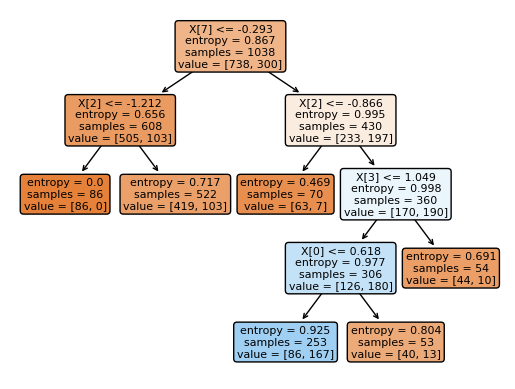

In [34]:
MakingTree('entropy', 0.02)

ROC_AUC(macro) =  0.7175188907637002


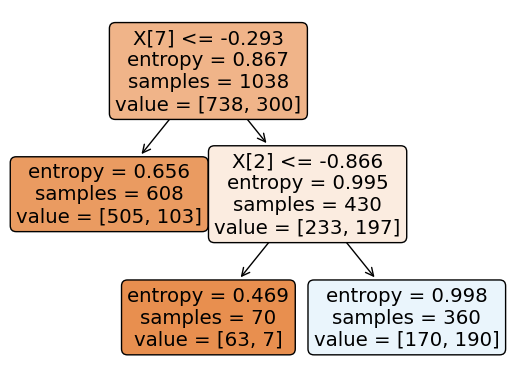

In [35]:
MakingTree('entropy', 0.025)

ROC_AUC(macro) =  0.7175188907637002
Выбираем данную модель, потому что либо предыдущие деревья переобучались, либо имели не наилучший макро усреднённый параметр ROC-AUC.


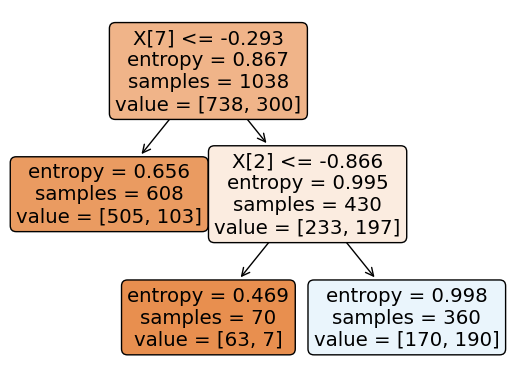

In [33]:
MakingTree('entropy', 0.03)
print("Выбираем данную модель, потому что либо предыдущие деревья переобучались, либо имели не наилучший макро усреднённый параметр ROC-AUC.")

ROC_AUC(macro) =  0.5


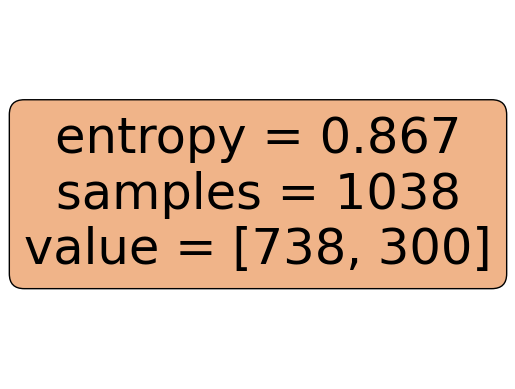

In [29]:
MakingTree('entropy', 0.2)

ROC_AUC(macro) =  0.5


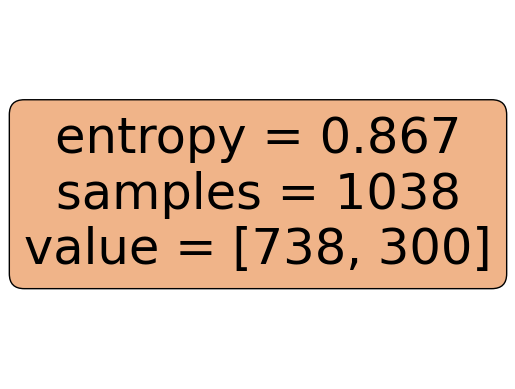

In [30]:
MakingTree('entropy', 0.8)

#### Для коэффициента Джини наилучшим дерево является при альфа = 0.005 с ROC_AUC(macro) =  0.6977 (For the Gini coefficient, the best tree is pre alpha = 0.005 with ROC_AUC(macro) = 0.6977)
#### Для энтропии наилучшим дерево является при альфа = 0.03 с ROC_AUC(macro) = 0.7176 (Для энтропии наилучшим дерево является при альфа = 0.03 с ROC_AUC(macro) = 0.7176)
#### Справочная информация (Background information):
#### ROC_AUC(macro) - предсказательная способность модели (вероятность ПРАВИЛЬНОГО отнесения новой полученной строки к положительным или отрицательным (к классу)) по макро усредненному среднему. (ROC_AUC(macro) - predictive ability of the model (the probability of CORRECTLY assigning the new received string to positive or negative (to the class)) according to the macro averaged average.)
#### Невзвешенное среднее - это среднее арифметическое значение набора чисел, где каждое число имеет одинаковый вес или значимость. Для вычисления невзвешенного среднего необходимо сложить все числа в наборе и разделить их на общее количество чисел в наборе (The unweighted mean is the arithmetic mean of a set of numbers where each number has the same weight or significance. To calculate the unweighted average, you need to add up all the numbers in the set and divide them by the total number of numbers in the set)

---
### Вывод (Conclusion):
#### Получили два разных дерева по коэфф. Джини и по энтропии. Дерево с наибольшим значением параметра ROC_AUC при энтропии. (I got two different trees by coefficient. Gini and entropy. The tree with the highest value of the ROC_AUC parameter at entropy.)

---
# Задание 6 (Task 6)
#### SVM-классификатор (SVM Classifier)

In [28]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [29]:
gammas = ['scale', 'auto', 1, 10, 0.1, 20, 0.01]
coef0s = [0, 1, 2, 5, 10, 0.1, 0.01]
degrees = [2, 3, 4, 5]
Cs = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

In [ ]:
#Не запускать!!!
from sklearn import svm


for krl in ['linear', 'poly', 'rbf', 'sigmoid']:
    best = [0]
    for gamma in gammas:
        for coef0 in coef0s:
            for degree in degrees:
                for C in Cs:
                    clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                            degree = degree, C = C)
                    clf.fit(train_table[Columns], 
                            train_table['Class'])
                    res = clf.predict(test_table[Columns])
                    score = clf.score(test_table[Columns],
                                      test_table[['Class']])
                    if score > best[0]:
                        best = [score, gamma, coef0, degree, C]
                        
    print(krl, best)

In [31]:
krl ='linear'

gammas = ['scale', 'auto', 1, 10, 0.1, 20, 0.01]
coef0s = [0, 1, 2, 5, 10, 0.1, 0.01]
degrees = [1, 2, 3, 4, 5]
Cs = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

best = [0]
for gamma in gammas:
    for coef0 in coef0s:
        for degree in degrees:
            for C in Cs:
                clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                              degree = degree, C = C)
                clf.fit(train_table[Columns], 
                        train_table['Class'])
                res = clf.predict(test_table[Columns])
                score = clf.score(test_table[Columns],
                                  test_table[['Class']])
                if score > best[0]:
                    best = [score, gamma, coef0, degree, C]
                        
print(krl, best)
clf = svm.SVC(kernel = krl, gamma = best[1], coef0 = best[2], degree = best[3], C = best[4])
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print("ROC_AUC(macro) = ", roc_auc_score(test_class, res, average = 'macro'))

linear [0.7488789237668162, 'scale', 0, 1, 0.1]
ROC_AUC(macro) =  0.4921624727948548


In [32]:
print(confusion_matrix(test_class, res))

[[285  32]
 [118  11]]


#### Правильная классификация тестовой выборки после разбиения (Correct classification of the test sample after splitting): 
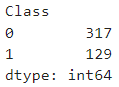

In [40]:
krl ='sigmoid'
best = [0]
for gamma in gammas:
    for coef0 in coef0s:
        for degree in degrees:
            for C in Cs:
                clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                              degree = degree, C = C)
                clf.fit(train_table[Columns], 
                        train_table['Class'])
                res = clf.predict(test_table[Columns])
                score = clf.score(test_table[Columns],
                                  test_table[['Class']])
                if score > best[0]:
                    best = [score, gamma, coef0, degree, C]
                        
print(krl, best)
clf = svm.SVC(kernel = krl, gamma = best[1], coef0 = best[2], degree = best[3], C = best[4])
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print("ROC_AUC(macro) = ", roc_auc_score(test_class, res, average = 'macro'))

sigmoid [0.757847533632287, 'scale', 0, 2, 0.1]
ROC_AUC(macro) =  0.4918934781013865


In [41]:
print(confusion_matrix(test_class, res))

[[275  42]
 [114  15]]


#### Правильная классификация тестовой выборки после разбиения (Correct classification of the test sample after splitting): 
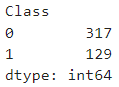

In [14]:
krl = 'poly'

gammas = [5, 2, 1]
coef0s = [5, 2]
degrees = [1, 2]
Cs = [0.01, 0.1, 1]

best = [0]
for gamma in gammas:
    for coef0 in coef0s:
        for degree in degrees:
            for C in Cs:
                clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                              degree = degree, C = C)
                clf.fit(train_table[Columns], 
                        train_table['Class'])
                res = clf.predict(test_table[Columns])
                score = clf.score(test_table[Columns],
                                  test_table[['Class']])
                if score > best[0]:
                    best = [score, gamma, coef0, degree, C]
                        
print(krl, best)
clf = svm.SVC(kernel = krl, gamma = best[1], coef0 = best[2], degree = best[3], C = best[4])
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print("ROC_AUC(macro) = ", roc_auc_score(test_class, res, average = 'macro'))

poly [0.7757847533632287, 2, 2, 2, 0.01]
ROC_AUC(macro) =  0.4815738634974201


In [15]:
print(confusion_matrix(test_class, res))

[[266  51]
 [113  16]]


#### Правильная классификация тестовой выборки после разбиения (Correct classification of the test sample after splitting): 
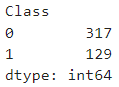

In [16]:
krl = 'rbf'

gammas = [1, 0.1]
coef0s = [1000, 100, 50]
degrees = [20, 10, 5, 1]
Cs = [5, 2, 1, 0.1]

best = [0]
for gamma in gammas:
    for coef0 in coef0s:
        for degree in degrees:
            for C in Cs:
                clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                              degree = degree, C = C)
                clf.fit(train_table[Columns], 
                        train_table['Class'])
                res = clf.predict(test_table[Columns])
                score = clf.score(test_table[Columns],
                                  test_table[['Class']])
                if score > best[0]:
                    best = [score, gamma, coef0, degree, C]
                        
print(krl, best)
clf = svm.SVC(kernel = krl, gamma = best[1], coef0 = best[2], degree = best[3], C = best[4])
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print("ROC_AUC(macro) = ", roc_auc_score(test_class, res, average = 'macro'))

rbf [0.7825112107623319, 0.1, 1000, 20, 2]
ROC_AUC(macro) =  0.4894602988286504


In [17]:
print(confusion_matrix(test_class, res))

[[271  46]
 [113  16]]


#### Правильная классификация тестовой выборки после разбиения (Correct classification of the test sample after splitting): 
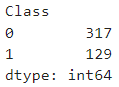

### Наилучшие значения параметров (Best parameter values):
####    linear [0.7489, 'scale', 0, 1, 0.1] с ROC_AUC(macro) =  0.4922
####    poly [0.7758, 2, 2, 2, 0.01] с ROC_AUC(macro) =  0.4816
####    rbf [0.7803, 0.1, 1000, 20, 2] с ROC_AUC(macro) =  0.4891
####    sigmoid [0.7578, 'scale', 0, 2, 0.1] с ROC_AUC(macro) =  0.4919

---
### Вывод (Conclusion):
#### Получили 4 разных классификатора. Модель с наибольшим значением параметра ROC_AUC - линейная. (I received 4 different classifiers. The model with the highest value of the ROC_AUC parameter is linear.)

----
# Задание 7 (Task 7)
## Случайный лес (Random Forest)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [43]:
def MakingRandomForest(n, feat, crit):
    clf = RandomForestClassifier(n_estimators = n, max_features = feat, criterion = crit)
    clf.fit(train_table[Columns], train_class)
    res = clf.predict(test_table[Columns])
    print(classification_report(test_table[['Class']], res))
    print("ROC_AUC(macro) = ", roc_auc_score(test_table[['Class']], res, average = 'macro'))

## Построим 3 леса для сравнения критериев (коэффициент Джинни и энтропию) с разным количеством деревьев в лесу (100, 300, 500), изменяя максимальную глубину дерева (3, 5, 7, 10). (Let's build 3 forests to compare criteria (Ginny coefficient and entropy) with different number of trees in the forest (100, 300, 500), changing the maximum depth of the tree (3, 5, 7, 10).)

## По коэффициенту Джини (By the Gini coefficient):

#### Максимальная глубина дерева = 3 (Maximum tree depth = 3)

In [84]:
MakingRandomForest(100, 3, 'gini')

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       317
           1       0.31      0.09      0.13       129

    accuracy                           0.68       446
   macro avg       0.51      0.50      0.47       446
weighted avg       0.60      0.68      0.61       446

ROC_AUC(macro) =  0.5047807693248233


In [85]:
MakingRandomForest(300, 3, 'gini')

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       317
           1       0.34      0.09      0.14       129

    accuracy                           0.69       446
   macro avg       0.53      0.51      0.47       446
weighted avg       0.61      0.69      0.62       446

ROC_AUC(macro) =  0.5095126305235614


In [86]:
MakingRandomForest(500, 3, 'gini')

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       317
           1       0.30      0.07      0.11       129

    accuracy                           0.68       446
   macro avg       0.51      0.50      0.46       446
weighted avg       0.59      0.68      0.61       446

ROC_AUC(macro) =  0.5017606925390653


#### Максимальная глубина дерева = 5 (Maximum tree depth = 5)

In [87]:
MakingRandomForest(100, 5, 'gini')

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       317
           1       0.29      0.09      0.14       129

    accuracy                           0.67       446
   macro avg       0.50      0.50      0.47       446
weighted avg       0.59      0.67      0.61       446

ROC_AUC(macro) =  0.5007703029858411


In [88]:
MakingRandomForest(300, 5, 'gini')

              precision    recall  f1-score   support

           0       0.71      0.93      0.80       317
           1       0.28      0.07      0.11       129

    accuracy                           0.68       446
   macro avg       0.50      0.50      0.46       446
weighted avg       0.59      0.68      0.60       446

ROC_AUC(macro) =  0.49860611840657326


In [89]:
MakingRandomForest(500, 5, 'gini')

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       317
           1       0.25      0.07      0.11       129

    accuracy                           0.67       446
   macro avg       0.48      0.49      0.45       446
weighted avg       0.58      0.67      0.60       446

ROC_AUC(macro) =  0.49229697014158896


#### Максимальная глубина дерева = 7 (Maximum tree depth = 7)

In [90]:
MakingRandomForest(100, 7, 'gini')

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       317
           1       0.24      0.08      0.12       129

    accuracy                           0.66       446
   macro avg       0.47      0.49      0.45       446
weighted avg       0.57      0.66      0.60       446

ROC_AUC(macro) =  0.48828650380260674


In [91]:
MakingRandomForest(300, 7, 'gini')

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       317
           1       0.31      0.10      0.15       129

    accuracy                           0.67       446
   macro avg       0.51      0.50      0.48       446
weighted avg       0.60      0.67      0.61       446

ROC_AUC(macro) =  0.5046462719780892


In [92]:
MakingRandomForest(500, 7, 'gini')

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       317
           1       0.24      0.07      0.11       129

    accuracy                           0.67       446
   macro avg       0.47      0.49      0.45       446
weighted avg       0.57      0.67      0.60       446

ROC_AUC(macro) =  0.49071968307534297


#### Максимальная глубина дерева = 10 (Maximum tree depth = 10)

In [93]:
MakingRandomForest(100, 10, 'gini')

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       317
           1       0.34      0.12      0.17       129

    accuracy                           0.68       446
   macro avg       0.53      0.51      0.49       446
weighted avg       0.61      0.68      0.62       446

ROC_AUC(macro) =  0.5123982099625852


In [94]:
MakingRandomForest(300, 10, 'gini')

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       317
           1       0.26      0.08      0.12       129

    accuracy                           0.67       446
   macro avg       0.48      0.49      0.46       446
weighted avg       0.58      0.67      0.60       446

ROC_AUC(macro) =  0.49301836500134494


In [95]:
MakingRandomForest(500, 10, 'gini')

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       317
           1       0.27      0.09      0.14       129

    accuracy                           0.66       446
   macro avg       0.49      0.49      0.46       446
weighted avg       0.58      0.66      0.60       446

ROC_AUC(macro) =  0.49446115472085683


## Случайный лес (по коэффициенту Джини) оказался с наилучшим ROC_AUC(macro) = 0.5124 с максимальной глубиной дерева = 10 с количеством деревьев в лесу = 100. (A random forest (according to the Ginny coefficient) turned out to have the best ROC_AUC(macro) = 0.5124 with a maximum tree depth = 10 with the number of trees in the forest = 100.)

## По Энтропии (By Entropy):

#### Максимальная глубина дерева = 3 (Maximum tree depth = 3)

In [96]:
MakingRandomForest(100, 3, 'entropy')

              precision    recall  f1-score   support

           0       0.71      0.93      0.80       317
           1       0.27      0.06      0.10       129

    accuracy                           0.68       446
   macro avg       0.49      0.50      0.45       446
weighted avg       0.58      0.68      0.60       446

ROC_AUC(macro) =  0.4963074364805713


In [97]:
MakingRandomForest(300, 3, 'entropy')

              precision    recall  f1-score   support

           0       0.71      0.93      0.80       317
           1       0.26      0.06      0.10       129

    accuracy                           0.68       446
   macro avg       0.48      0.49      0.45       446
weighted avg       0.58      0.68      0.60       446

ROC_AUC(macro) =  0.49473014941432525


In [98]:
MakingRandomForest(500, 3, 'entropy')

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       317
           1       0.30      0.05      0.09       129

    accuracy                           0.69       446
   macro avg       0.51      0.50      0.45       446
weighted avg       0.59      0.69      0.60       446

ROC_AUC(macro) =  0.5018951898857995


#### Максимальная глубина дерева = 5 (Maximum tree depth = 5)

In [99]:
MakingRandomForest(100, 5, 'entropy')

              precision    recall  f1-score   support

           0       0.71      0.93      0.80       317
           1       0.28      0.07      0.11       129

    accuracy                           0.68       446
   macro avg       0.50      0.50      0.46       446
weighted avg       0.59      0.68      0.60       446

ROC_AUC(macro) =  0.49860611840657326


In [100]:
MakingRandomForest(300, 5, 'entropy')

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       317
           1       0.27      0.07      0.11       129

    accuracy                           0.68       446
   macro avg       0.49      0.50      0.46       446
weighted avg       0.58      0.68      0.60       446

ROC_AUC(macro) =  0.49702883134032716


In [101]:
MakingRandomForest(500, 5, 'entropy')

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       317
           1       0.29      0.08      0.12       129

    accuracy                           0.68       446
   macro avg       0.50      0.50      0.46       446
weighted avg       0.59      0.68      0.61       446

ROC_AUC(macro) =  0.4993275132663292


#### Максимальная глубина дерева = 7 (Maximum tree depth = 7)

In [102]:
MakingRandomForest(100, 7, 'entropy')

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       317
           1       0.26      0.09      0.13       129

    accuracy                           0.67       446
   macro avg       0.48      0.49      0.46       446
weighted avg       0.58      0.67      0.60       446

ROC_AUC(macro) =  0.49373975986110086


In [103]:
MakingRandomForest(300, 7, 'entropy')

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       317
           1       0.24      0.08      0.12       129

    accuracy                           0.66       446
   macro avg       0.48      0.49      0.45       446
weighted avg       0.57      0.66      0.60       446

ROC_AUC(macro) =  0.4898637908688528


In [104]:
MakingRandomForest(500, 7, 'entropy')

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       317
           1       0.26      0.07      0.11       129

    accuracy                           0.67       446
   macro avg       0.48      0.49      0.45       446
weighted avg       0.58      0.67      0.60       446

ROC_AUC(macro) =  0.493874257207835


#### Максимальная глубина дерева = 10 (Maximum tree depth = 10)

In [105]:
MakingRandomForest(100, 10, 'entropy')

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       317
           1       0.26      0.08      0.12       129

    accuracy                           0.67       446
   macro avg       0.49      0.49      0.46       446
weighted avg       0.58      0.67      0.60       446

ROC_AUC(macro) =  0.494595652067591


In [106]:
MakingRandomForest(300, 10, 'entropy')

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       317
           1       0.22      0.07      0.11       129

    accuracy                           0.66       446
   macro avg       0.46      0.48      0.45       446
weighted avg       0.56      0.66      0.59       446

ROC_AUC(macro) =  0.4844105348103587


In [107]:
MakingRandomForest(500, 10, 'entropy')

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       317
           1       0.26      0.08      0.12       129

    accuracy                           0.67       446
   macro avg       0.49      0.49      0.46       446
weighted avg       0.58      0.67      0.60       446

ROC_AUC(macro) =  0.494595652067591


## Случайный лес (по Энтропии) оказался с наилучшим ROC_AUC(macro) = 0.5019 с максимальной глубиной дерева = 3 с количеством деревьев в лесу = 500. (A random forest (by Entropy) turned out to have the best ROC_AUC(macro) = 0.5019 with a maximum tree depth = 3 with the number of trees in the forest = 500.)
#### Случайный лес (по Джини): ROC_AUC(macro) = 0.5124

---
### Вывод (Conclusion):
#### Получили 2 разных случайных леса. Модель с наибольшим значением параметра ROC_AUC - по коэффициенту Джини. (Got 2 different random forests. The model with the highest value of the ROC_AUC parameter is based on the Gini coefficient.)

----
# Задание 8 (Task 8)
## Проводим обогащение, разбиваем бывшую обучающую выборку на новую обучающую и тестовую (валидационную) выборки. Проводим сравнение на уже лучших классификаторах и выбираем самое лучшее по метрике ROC_AUC. (We are enriching, splitting the former training sample into new training and test (validation) samples. We make a comparison on the already best classifiers and choose the best according to the ROC_AUC metric.)
##### Тестовой выборкой становится валидационная выборка, составляющая 2 части из 7. (The test sample becomes the validation sample, which is 2 parts out of 7.)

In [160]:
print("Обогащение")
table_stat = {}
for i in range(0, train_table['Class'].size):
    if train_table['Class'][i] in table_stat:
        table_stat[train_table['Class'][i]].append(df.iloc[i])
    else:
        table_stat[train_table['Class'][i]] = []
        table_stat[train_table['Class'][i]].append(df.iloc[i])
maximum = len(table_stat[1])
print(maximum)
for key in table_stat:
    if len(table_stat[key]) > maximum:
        maximum = len(table_stat[key])
print(maximum)

Обогащение
300
738


In [177]:
import random
random.seed(22222)

In [178]:
print(train_table)
for key in table_stat:
    while len(table_stat[key]) < maximum:
        i = random.randint(0, len(table_stat[key]) - 1)
        table_stat[key].append(table_stat[key][i])
        train_table = train_table.concat(table_stat[key][i])
for key in table_stat:
    print(len(table_stat[key]))
print(train_table)

      level_0   index       Mcg       Gvh       Alm       Mit      Erl  \
0         915   889.0 -0.146600 -0.241621  1.038380  1.085826 -0.09759   
1         719   775.0  1.966286  1.776419 -0.231226 -0.008654 -0.09759   
2         898   511.0  1.966286  0.807760 -0.923739  0.502104 -0.09759   
3         118   110.0 -0.365174 -0.725950 -0.000389  1.450653 -0.09759   
4         862   732.0 -0.073742  0.161987  0.345867  3.201820 -0.09759   
...       ...     ...       ...       ...       ...       ...      ...   
1048      324  1096.0 -0.583749 -1.775331 -0.115808 -0.300515 -0.09759   
1049      682   406.0 -0.948039 -1.291002  0.922961 -0.154584 -0.09759   
1050       47  1148.0 -0.948039 -1.694610 -0.577483 -0.811272 -0.09759   
1051      756   536.0  0.873414  1.130646  0.692124 -0.446445 -0.09759   
1052      298     NaN -1.166614 -0.968115 -0.577483 -0.519411 -0.09759   

           Pox       Vac       Nuc  Class  
0    -0.099131  1.040456 -0.058236    1.0  
1    -0.099131  0.17506

In [165]:
print(train_table.describe())

             index          Mcg          Gvh          Alm          Mit  \
count  1038.000000  1475.000000  1475.000000  1475.000000  1475.000000   
mean    734.782274     0.014429    -0.001207     0.065654     0.051500   
std     424.397837     0.992138     0.999876     1.023452     1.025533   
min       2.000000    -2.842351    -2.905433    -3.347532    -1.905752   
25%     363.250000    -0.656607    -0.645229    -0.462064    -0.665341   
50%     735.500000    -0.146600    -0.080178     0.115030    -0.227549   
75%    1087.750000     0.581981     0.565595     0.692124     0.502104   
max    1483.000000     3.642023     4.036624     5.770548     5.390779   

               Erl          Pox          Vac          Nuc        Class  
count  1475.000000  1475.000000  1475.000000  1475.000000  1475.000000  
mean      0.028648     0.042274    -0.031812    -0.072310     0.280000  
std       1.136142     1.197728     1.095666     0.911223     0.449151  
min      -0.097590    -0.099131    -8.651

In [166]:
train_table, test_table = train_test_split(train_table, train_size = 5/7, stratify = train_table['Class'])
train_class, test_class = train_test_split(train_table['Class'], train_size = 5/7, stratify = train_table['Class'])

train_table = train_table.reset_index()
test_table = test_table.reset_index()
#train_class = train_class
#test_class = test_class

df_test_table = pd.DataFrame(test_table, columns = col)
df_train_table = pd.DataFrame(train_table, columns = col)

df_test_class = pd.DataFrame(test_class, columns = ['Class'])
df_train_class = pd.DataFrame(train_class, columns = ['Class'])

print('train_table:')
df_train_table

train_table:


,index,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,889.0,-0.146600,-0.241621,1.038380,1.085826,-0.09759,-0.099131,1.040456,-0.058236,1.0
1,775.0,1.966286,1.776419,-0.231226,-0.008654,-0.09759,-0.099131,0.175062,-0.527919,0.0
2,511.0,1.966286,0.807760,-0.923739,0.502104,-0.09759,-0.099131,1.213535,-0.527919,0.0
3,110.0,-0.365174,-0.725950,-0.000389,1.450653,-0.09759,6.509628,0.001983,-0.058236,0.0
4,732.0,-0.073742,0.161987,0.345867,3.201820,-0.09759,-0.099131,0.175062,-0.527919,0.0
...,...,...,...,...,...,...,...,...,...,...
1048,1096.0,-0.583749,-1.775331,-0.115808,-0.300515,-0.09759,-0.099131,0.867377,0.599321,1.0
1049,406.0,-0.948039,-1.291002,0.922961,-0.154584,-0.09759,-0.099131,-1.036491,-0.903666,1.0
1050,1148.0,-0.948039,-1.694610,-0.577483,-0.811272,-0.09759,-0.099131,-0.171096,-0.527919,1.0
1051,536.0,0.873414,1.130646,0.692124,-0.446445,-0.09759,-0.099131,-0.344175,0.505385,1.0


In [167]:
print('test_table:')
df_test_table

test_table:


,index,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,633.0,-0.729465,1.937862,-0.115808,-0.738307,-0.09759,-0.099131,0.175062,-0.527919,0.0
1,52.0,-0.365174,-0.322342,0.576705,1.231757,-0.09759,-0.099131,0.867377,0.975068,1.0
2,504.0,-1.676621,0.484874,0.692124,-0.592376,-0.09759,-0.099131,0.348141,-0.527919,0.0
3,1186.0,-0.073742,-1.533166,-0.808320,-0.154584,-0.09759,-0.099131,0.694298,-0.527919,0.0
4,47.0,-0.073742,-0.887394,0.230449,0.210242,-0.09759,-0.099131,-0.344175,-0.527919,0.0
...,...,...,...,...,...,...,...,...,...,...
417,12.0,-0.729465,-0.645229,0.807542,0.648034,-0.09759,-0.099131,0.521219,-0.246109,0.0
418,524.0,0.290549,0.323430,-0.115808,-0.884237,-0.09759,-0.099131,1.040456,-0.527919,0.0
419,1182.0,-2.259486,1.292089,1.153799,-0.884237,-0.09759,-0.099131,-5.190385,-0.246109,1.0
420,1259.0,-0.219458,0.484874,0.922961,-0.519411,-0.09759,-0.099131,-1.036491,3.417423,0.0


In [168]:
print(df_train_class.value_counts())
print(df_test_class.value_counts())

Class
0.0      541
1.0      211
dtype: int64
Class
0.0      217
1.0       84
dtype: int64


## Деревья принятия решений (Decision trees):

### 1) По коэффициенту Джини (By the Gini coefficient)

ROC_AUC(macro) =  0.649057760927743


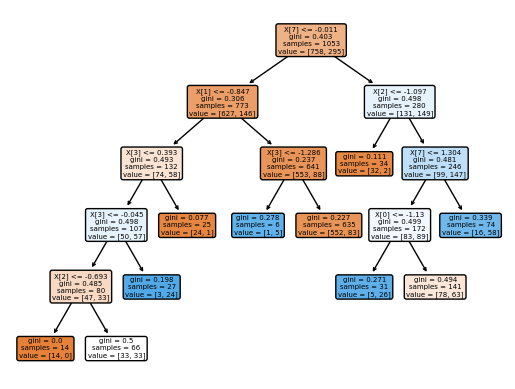

In [169]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.005)
clf.fit(train_table[Columns], train_table[['Class']])
    
tree.plot_tree(clf,filled = True, rounded = True)
plt.savefig('tree.pdf') ##для сохранение в пдф
plt.show
    
print("ROC_AUC(macro) = ", roc_auc_score(test_table[['Class']], clf.predict(test_table[Columns]), average = 'macro'))

### 2) По энтропии

ROC_AUC(macro) =  0.6202609277430866


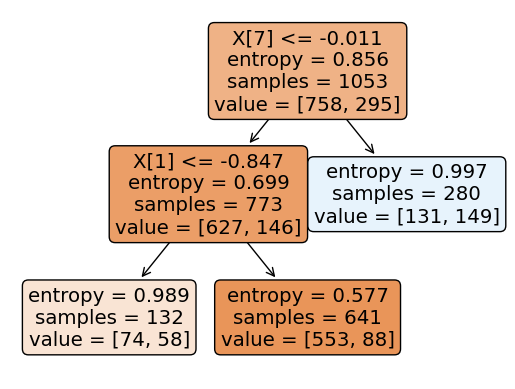

In [170]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.03) 
clf.fit(train_table[Columns], train_table[['Class']])
    
tree.plot_tree(clf,filled = True, rounded = True)
plt.savefig('tree.pdf') ##для сохранение в пдф
plt.show
    
print("ROC_AUC(macro) = ", roc_auc_score(test_table[['Class']], clf.predict(test_table[Columns]), average = 'macro'))

## SVM-классификаторы:

### 1) Линейное ядро

In [171]:
clf = svm.SVC(kernel = 'linear', gamma ='scale', coef0 = 0, degree = 1, C = 0.1)
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])
print(confusion_matrix(test_table[['Class']], res))

print("ROC_AUC(macro) = ", roc_auc_score(test_table[['Class']], clf.predict(test_table[Columns]), average = 'macro'))

[[283  21]
 [ 86  32]]
ROC_AUC(macro) =  0.6010537466547725


#### Правильная классификация тестовой(валидационной) выборки после разбиения и обогащения: 
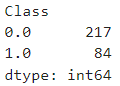

### 2) Полиномиальное ядро

In [172]:
clf = svm.SVC(kernel = 'poly', gamma = 2, coef0 = 2, degree = 2, C = 0.01)
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])
print(confusion_matrix(test_table[['Class']], res))

print("ROC_AUC(macro) = ", roc_auc_score(test_table[['Class']], clf.predict(test_table[Columns]), average = 'macro'))

[[281  23]
 [ 69  49]]
ROC_AUC(macro) =  0.6697981712756467


#### Правильная классификация тестовой(валидационной) выборки после разбиения и обогащения: 
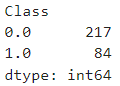

### 3) Радиальная базисная функция

In [173]:
clf = svm.SVC(kernel = 'rbf', gamma = 0.1, coef0 = 1000, degree = 20, C = 2)
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])
print(confusion_matrix(test_table[['Class']], res))

print("ROC_AUC(macro) = ", roc_auc_score(test_table[['Class']], clf.predict(test_table[Columns]), average = 'macro'))

[[277  27]
 [ 59  59]]
ROC_AUC(macro) =  0.7055921052631579


#### Правильная классификация тестовой(валидационной) выборки после разбиения и обогащения: 
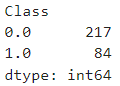

### 4) Сигмоид

In [174]:
clf = svm.SVC(kernel = 'sigmoid', gamma = 'scale', coef0 = 0, degree = 2, C = 0.1)
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])
print(confusion_matrix(test_table[['Class']], res))

print("ROC_AUC(macro) = ", roc_auc_score(test_table[['Class']], clf.predict(test_table[Columns]), average = 'macro'))

[[282  22]
 [ 90  28]]
ROC_AUC(macro) =  0.5824598572702944


#### Правильная классификация тестовой(валидационной) выборки после разбиения и обогащения: 
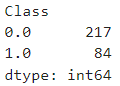

## Случайные леса:

### 1) По коэффициенту Джини

In [175]:
clf = RandomForestClassifier(n_estimators = 100, max_features = 10, criterion = 'gini')
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])
print(confusion_matrix(test_table[['Class']], res))

print("ROC_AUC(macro) = ", roc_auc_score(test_table[['Class']], clf.predict(test_table[Columns]), average = 'macro'))

[[274  30]
 [ 43  75]]
ROC_AUC(macro) =  0.7684545049063337


### 2) По Энтропии

In [176]:
clf = RandomForestClassifier(n_estimators = 500, max_features = 3, criterion = 'entropy')
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])
print(confusion_matrix(test_table[['Class']], res))

print("ROC_AUC(macro) = ", roc_auc_score(test_table[['Class']], clf.predict(test_table[Columns]), average = 'macro'))

[[279  25]
 [ 43  75]]
ROC_AUC(macro) =  0.77667818911686


## Таким образом, наилучшим классификатором оказался случайный лес по энтропии с максимальной глубиной дерева = 3 с количеством деревьев в лесу = 500.